In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
%load_ext autoreload
%autoreload 2

from DLC_for_WBFM.utils.feature_detection.utils_features import *
from DLC_for_WBFM.utils.feature_detection.utils_tracklets import *
from DLC_for_WBFM.utils.feature_detection.utils_detection import *
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import *
from DLC_for_WBFM.utils.feature_detection.feature_pipeline import *
from DLC_for_WBFM.utils.feature_detection.utils_affine import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Get the 3d bigtiff folder
bigtiff_folder = r'D:\More-stabilized-wbfm'

btf_fname_red = r'test2020-10-22_16-15-20_test4-channel-0-pco_camera1\test2020-10-22_16-15-20_test4-channel-0-pco_camera1bigtiff.btf'
btf_fname_red = os.path.join(bigtiff_folder, btf_fname_red)

In [39]:
# Get two sets of matches: affine, and feature-based
opt = {'start_frame':0,
       'num_frames':25,
      'use_affine_matching':True}
a_matches, a_conf, a_frames = track_neurons_full_video(btf_fname_red, **opt)

opt = {'start_frame':0,
       'num_frames':25,
      'use_affine_matching':False}
f_matches, f_conf, f_frames = track_neurons_full_video(btf_fname_red, **opt)

 17%|█████████████▊                                                                     | 4/24 [00:59<05:21, 16.09s/it]

[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.


 25%|████████████████████▊                                                              | 6/24 [01:26<04:17, 14.29s/it]

[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.


 33%|███████████████████████████▋                                                       | 8/24 [01:55<03:45, 14.06s/it]

[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.


 17%|█████████████▊                                                                     | 4/24 [00:36<03:00,  9.03s/it]

[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.


 25%|████████████████████▊                                                              | 6/24 [00:53<02:38,  8.83s/it]

[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.


 33%|███████████████████████████▋                                                       | 8/24 [01:11<02:23,  8.96s/it]

[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [04:28<00:00, 11.20s/it]


## Plotting

In [40]:

k = (11,12)

a0_unmatched = a_frames[k[0]].neuron_locs
a1_unmatched = a_frames[k[1]].neuron_locs
this_match, this_conf = a_matches[k], a_conf[k]
# all_m, all_c, to_remove_ind = keep_best_match(this_match, this_conf)

a_xyz = np.zeros((len(this_match), 3), dtype=np.float32) # Start point
a_dat = np.zeros((len(this_match), 3), dtype=np.float32) # Difference vector
for m, match in enumerate(this_match):
    v0 = a0_unmatched[match[0]]
    v1 = a1_unmatched[match[1]]
    a_xyz[m, :] = v0
    a_dat[m, :] = v1 - v0

f0_unmatched = f_frames[k[0]].neuron_locs
f1_unmatched = f_frames[k[1]].neuron_locs
this_match, this_conf = f_matches[k], f_conf[k]
# all_m, all_c, to_remove_ind = keep_best_match(this_match, this_conf)

f_xyz = np.zeros((len(this_match), 3), dtype=np.float32) # Start point
f_dat = np.zeros((len(this_match), 3), dtype=np.float32) # Difference vector
for m, match in enumerate(this_match):
    v0 = f0_unmatched[match[0]]
    v1 = f1_unmatched[match[1]]
    f_xyz[m, :] = v0
    f_dat[m, :] = v1 - v0

<IPython.core.display.Javascript object>


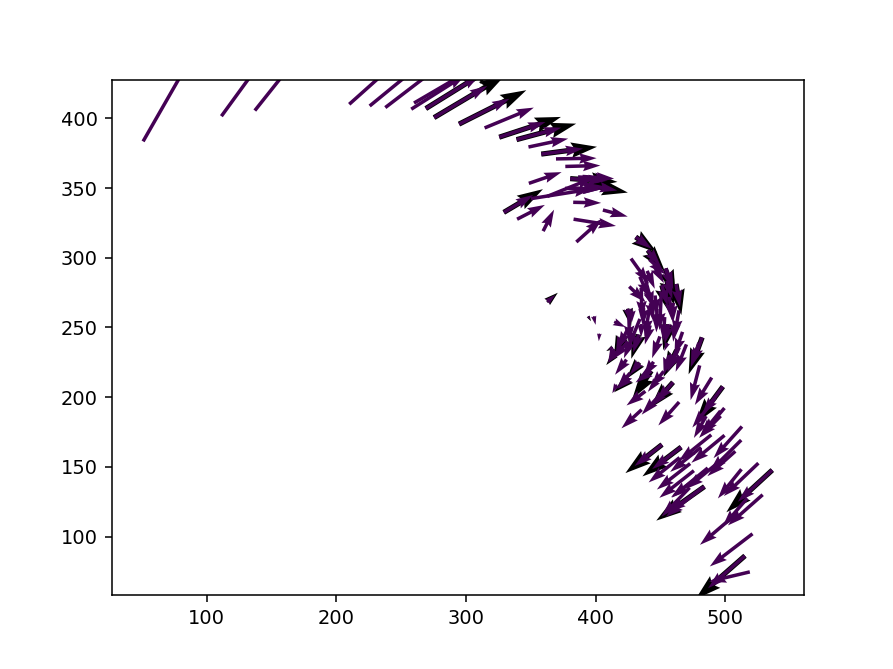

In [41]:
%matplotlib notebook

# C = dat[:,2] / np.max(dat[:,1])
plt.quiver(a_xyz[:,1], a_xyz[:,2], a_dat[:,1], a_dat[:,2])

# C = f_dat[:,2] / np.max(f_dat[:,1])
plt.quiver(f_xyz[:,1], f_xyz[:,2], f_dat[:,1], f_dat[:,2], [1])

In [42]:

# Affine
pc0 = build_neuron_tree(a_xyz, False)[1]
pc1 = build_neuron_tree(a_xyz+a_dat, False)[1]

affine_lines = build_line_set_from_matches(pc0, pc1, matches=None)

# Feature (same points, ordered differently)
pc0 = build_neuron_tree(f_xyz, False)[1]
pc0.paint_uniform_color([0,0,0])
pc1 = build_neuron_tree(f_xyz+f_dat, False)[1]
pc1.paint_uniform_color([0.5,0.5,0.5])

feature_lines = build_line_set_from_matches(pc0, pc1, matches=None, color=[1,0,0])
# Offset for visualization
feature_lines.translate(np.array([0.5,0.5,0.5]))

LineSet with 141 lines.

In [ ]:
o3d.visualization.draw_geometries([pc0, pc1, affine_lines, feature_lines])

In [16]:
o3d.geometry.LineSet?